In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv("market_fact.csv")
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


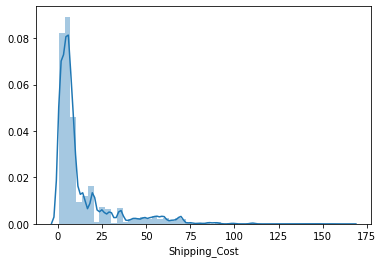

In [9]:
sns.distplot(df["Shipping_Cost"])
plt.show()

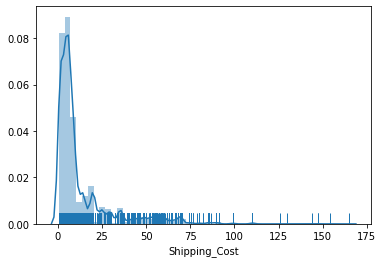

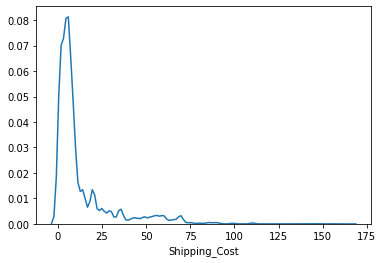

In [13]:
plt.figure(1)

plt.subplot(111)
sns.distplot(df["Shipping_Cost"], rug = True)

plt.figure(2)
plt.subplot(111)
sns.distplot(df["Shipping_Cost"], hist = False)
plt.show()

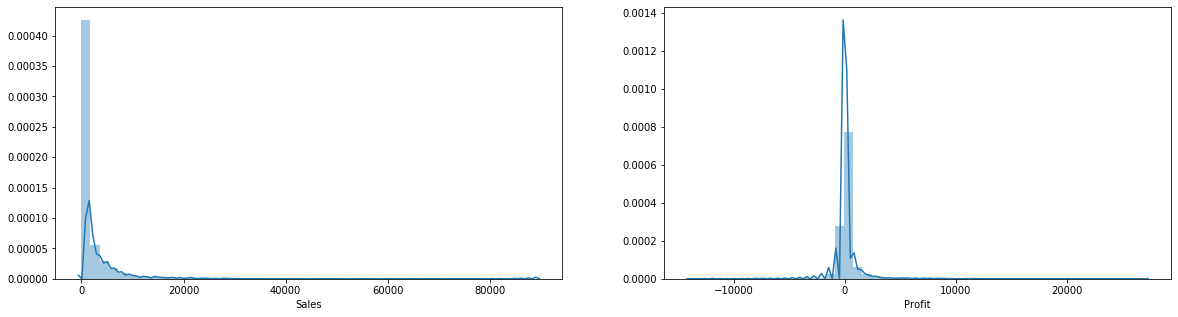

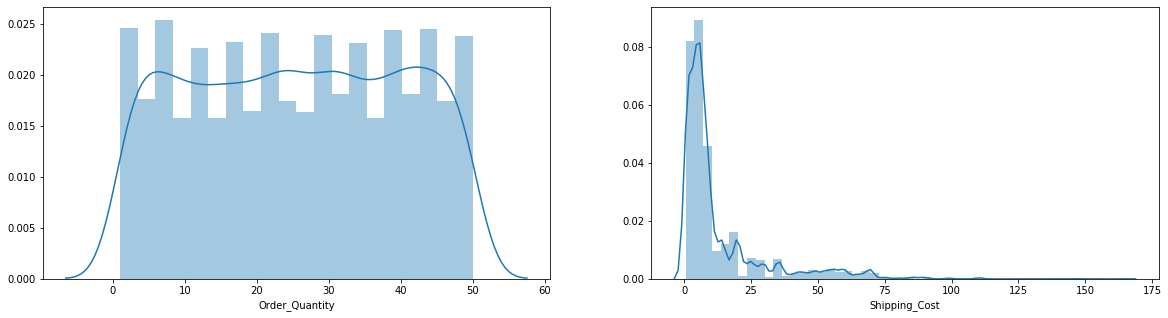

In [30]:
plt.figure(1)

plt.subplot(121)
sns.distplot(df["Sales"])

plt.subplot(122)
sns.distplot(df["Profit"])

plt.figure(2)

plt.subplot(121)
sns.distplot(df["Order_Quantity"])

plt.subplot(122)
sns.distplot(df["Shipping_Cost"])

plt.rcParams["figure.figsize"]=(20,50)
plt.show()

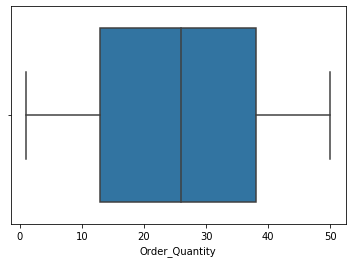

In [5]:
sns.boxplot(df["Order_Quantity"])
#plt.figure(figsize=(5,2))
plt.show()

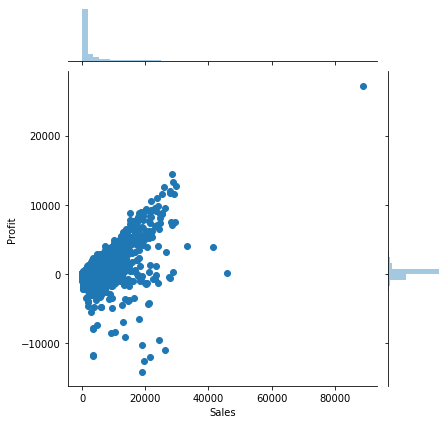

In [6]:
#Bivariate Analysis

sns.jointplot("Sales","Profit",df)
plt.show()

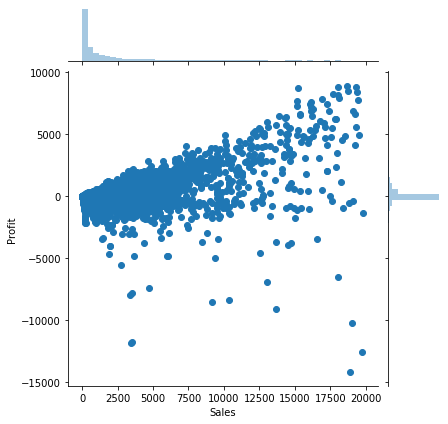

In [9]:
df = df[(df.Profit < 10000) & (df.Sales < 20000)]

sns.jointplot("Sales", "Profit", df)
plt.show()

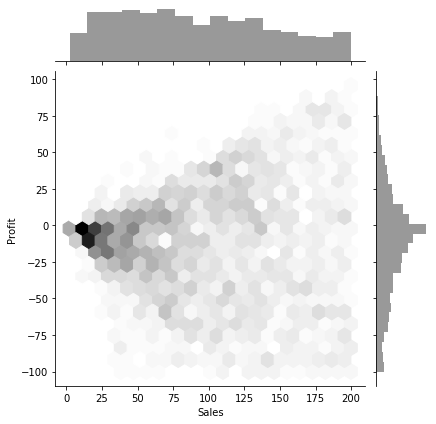

In [11]:
df = pd.read_csv("market_fact.csv")
df = df [(df.Profit < 100) & (df.Profit > -100) & (df.Sales < 200)]

sns.jointplot("Sales" , "Profit" ,df , kind ="hex" , color = "k")
plt.show()

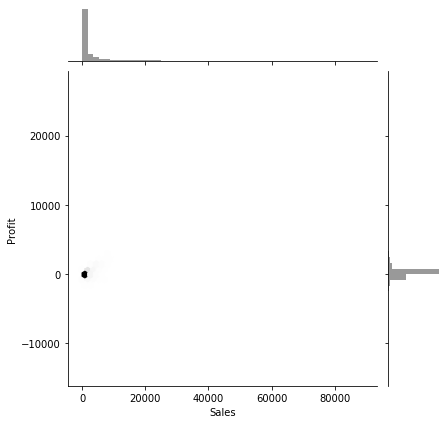

In [12]:
df = pd.read_csv("market_fact.csv")

sns.jointplot("Sales" , "Profit" ,df , kind ="hex" , color = "k")
plt.show() 

In [15]:
btc = pd.read_csv("bitcoin_price.csv")
ether = pd.read_csv("ethereum_price.csv")
ltc = pd.read_csv("litecoin_price.csv")
monero = pd.read_csv("monero_price.csv")
neo = pd.read_csv("neo_price.csv")
quantum = pd.read_csv("qtum_price.csv")
ripple = pd.read_csv("ripple_price.csv")

btc.columns = btc.columns.map(lambda x: str(x) + '_btc')
ether.columns = ether.columns.map(lambda x: str(x) + '_et')
ltc.columns = ltc.columns.map(lambda x: str(x) + '_ltc')
monero.columns = monero.columns.map(lambda x: str(x) + '_mon')
neo.columns = neo.columns.map(lambda x: str(x) + '_neo')
quantum.columns = quantum.columns.map(lambda x: str(x) + '_qt')
ripple.columns = ripple.columns.map(lambda x: str(x) + '_rip')

btc.head()

,Date_btc,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Market Cap_btc
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


In [19]:
m1 = pd.merge(btc, ether, how = "inner", left_on ="Date_btc", right_on="Date_et")
m2 = pd.merge(m1 , ltc, how ="inner", left_on = "Date_btc", right_on = "Date_ltc")
m3 = pd.merge(m2 , monero, how ="inner", left_on = "Date_btc", right_on = "Date_mon")
m4 = pd.merge(m3 , neo, how ="inner", left_on = "Date_btc", right_on = "Date_neo")
m5 = pd.merge(m4 , quantum, how ="inner", left_on = "Date_btc", right_on = "Date_qt")
crypto = pd.merge(m5 , ripple, how ="inner", left_on = "Date_btc", right_on = "Date_rip")

crypto.head()

,Date_btc,Open_btc,High_btc,Low_btc,Close_btc,Volume_btc,Market Cap_btc,Date_et,Open_et,High_et,...,Close_qt,Volume_qt,Market Cap_qt,Date_rip,Open_rip,High_rip,Low_rip,Close_rip,Volume_rip,Market Cap_rip
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000","Nov 07, 2017",298.57,304.84,...,11.21,"122,951,000","760,320,000","Nov 07, 2017",0.205103,0.211375,0.203978,0.210354,"114,073,000","7,902,920,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000","Nov 06, 2017",296.43,305.42,...,10.44,"116,937,000","745,802,000","Nov 06, 2017",0.201967,0.208662,0.201410,0.205990,"102,233,000","7,782,080,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000","Nov 05, 2017",300.04,301.37,...,10.13,"49,288,500","739,113,000","Nov 05, 2017",0.203274,0.205124,0.201117,0.202055,"46,959,000","7,832,450,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000","Nov 04, 2017",305.48,305.48,...,10.05,"35,477,100","759,110,000","Nov 04, 2017",0.208083,0.208479,0.202133,0.203750,"74,013,200","8,017,770,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000","Nov 03, 2017",288.50,308.31,...,10.38,"55,018,600","719,701,000","Nov 03, 2017",0.206205,0.228026,0.201728,0.208133,"373,402,000","7,945,410,000"


In [34]:
curr  = crypto[["Close_btc", "Close_et","Close_ltc", "Close_mon", "Close_neo", "Close_qt"]]
curr.head()

,Close_btc,Close_et,Close_ltc,Close_mon,Close_neo,Close_qt
0,7144.38,294.66,61.30,99.76,26.23,11.21
1,7022.76,298.89,55.17,102.92,26.32,10.44
2,7407.41,296.26,54.75,86.35,26.38,10.13
3,7379.95,300.47,55.04,87.30,26.49,10.05
4,7207.76,305.71,56.18,87.99,26.82,10.38


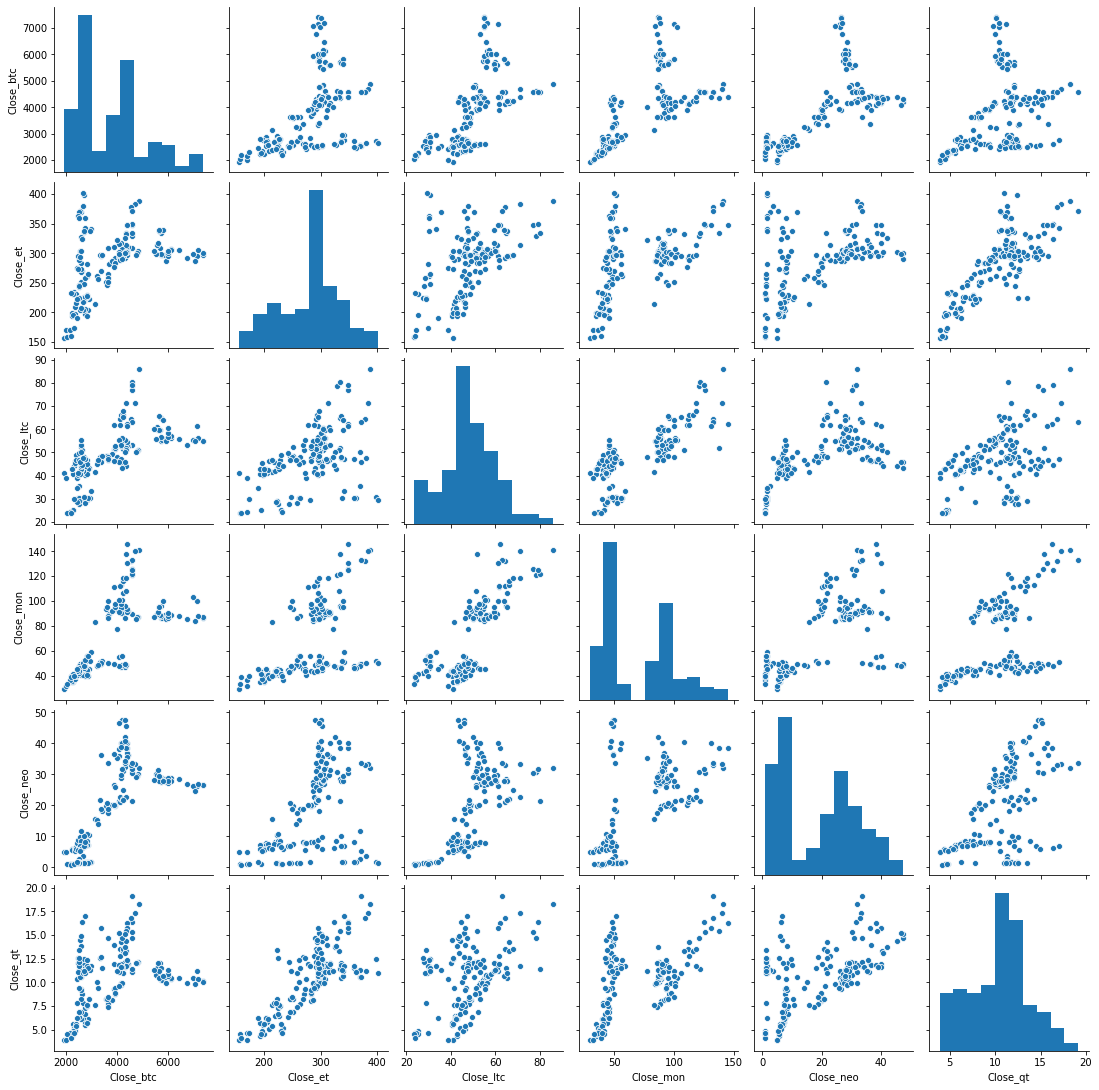

In [35]:
sns.pairplot(curr)
plt.show()

In [36]:
correlation = curr.corr()
round(correlation,3)

,Close_btc,Close_et,Close_ltc,Close_mon,Close_neo,Close_qt
Close_btc,1.000,0.449,0.658,0.697,0.735,0.382
Close_et,0.449,1.000,0.490,0.539,0.482,0.791
Close_ltc,0.658,0.490,1.000,0.793,0.641,0.448
Close_mon,0.697,0.539,0.793,1.000,0.669,0.518
Close_neo,0.735,0.482,0.641,0.669,1.000,0.557
Close_qt,0.382,0.791,0.448,0.518,0.557,1.000


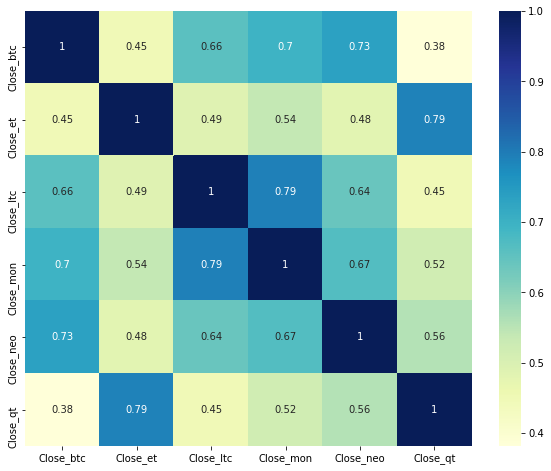

In [37]:
plt.figure(figsize=(10,8))

sns.heatmap(correlation, cmap= "YlGnBu",annot=True)
plt.show()